# Reuters newswire classfication - 79.8 % accuracy over 5 epochs

In [1]:
from __future__ import print_function
from __future__ import absolute_import

from keras.datasets import reuters
from keras.models import Model
from keras.layers import Dense, Input, Activation
from keras.optimizers import RMSprop
from keras.layers.merge import concatenate

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


### downloading the data

In [2]:
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

### encoding the data

In [4]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

### network parameters

In [5]:
hidden_units = 512
epochs = 5
batch_size = 32
input_shape = (10000,)
num_labels = len(np.unique(y_train))

### build the model

In [6]:
def build_model():
	left_inputs = Input(shape=input_shape)
	x = left_inputs
	for i in range(2):
		x = Dense(hidden_units)(x)
		x = Activation('relu')(x)
	
	right_inputs = Input(shape=input_shape)
	y = right_inputs
	for i in range(2):
		y = Dense(hidden_units)(y)
		y = Activation('relu')(y)
	
	z = concatenate([x,y])
	outputs = Dense(num_labels)(z)
	outputs = Activation('softmax')(outputs)
	return Model([left_inputs,right_inputs],outputs)

### compiling and training the model

In [9]:
model = build_model()
optimizer = RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
	      metrics=['accuracy'])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


history = model.fit([partial_x_train,partial_x_train],
                    partial_y_train,
                    batch_size=batch_size,
                    validation_data=([x_val,x_val],y_val),
                    epochs=epochs)

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 22s 3ms/step - loss: 1.7997 - accuracy: 0.6199 - val_loss: 1.2485 - val_accuracy: 0.7150
Epoch 2/5
7982/7982 [==============================] - 22s 3ms/step - loss: 1.0199 - accuracy: 0.7803 - val_loss: 1.0048 - val_accuracy: 0.7910
Epoch 3/5
7982/7982 [==============================] - 22s 3ms/step - loss: 0.7246 - accuracy: 0.8455 - val_loss: 0.8865 - val_accuracy: 0.8180
Epoch 4/5
7982/7982 [==============================] - 22s 3ms/step - loss: 0.5272 - accuracy: 0.8882 - val_loss: 0.8485 - val_accuracy: 0.8240
Epoch 5/5
7982/7982 [==============================] - 22s 3ms/step - loss: 0.3955 - accuracy: 0.9143 - val_loss: 0.8038 - val_accuracy: 0.8330


### evaluate the model

In [10]:
score = model.evaluate([x_test,x_test],y_test)
print("\nScore: %.1f%%" % (100.0*score[1]))

2246/2246 [==============================] - 1s 271us/step

Score: 79.8%


### plotting the training and validation loss

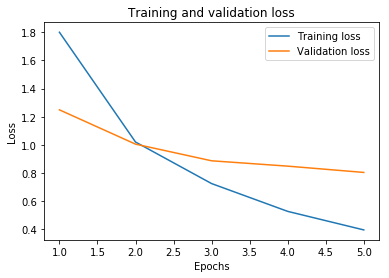

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### plotting the training and validation accuracy

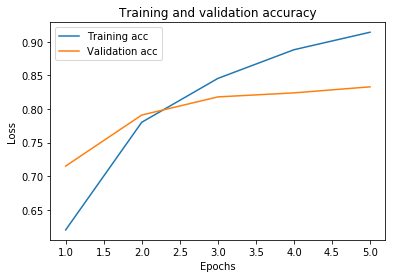

In [15]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,label='Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()